# Udacity Data Scientist Nanodegree

## Project 1(Wirte A Data Science Blog Post)

### Stack Overflow Annual Developer Survey-2019

In this Survey 90,000 responses fielded from over 170 countries and dependent territories, our 2019 Annual Developer Survey examines all aspects of the developer experience from career satisfaction and job search to education and opinions on open source software.

 Find the Stack Overflow Survey-2019 Data Set [Download Full Data Set (CSV)](https://drive.google.com/file/d/1QOmVDpd8hcVYqqUXDXf68UMDWQZP0wQV/view)
 

### Questions:
1. Which country have hightest job satisfaction has a developer?
2. Different between job satisfaction has a developer, From Undergraduate computer field or those who different field?
3. Since developers who contribute to open source have higher salary then who are not?

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('survey_results_public.csv')

## Data Accquistion and Data Preparation:

In [4]:
# Filter by the data only 'I am a developer by profession' rows in MainBranch column.
main_branch_data = data[data['MainBranch'] == 'I am a developer by profession']

#Fill The N/A in JobSat column using mode.
main_branch_data['JobSat']= main_branch_data['JobSat'].fillna(main_branch_data['JobSat'].mode()[0])

# First group the country and Fill the N/A in ConvertedComp column with mean.
annual_salary_per_coutry=main_branch_data.groupby('Country')['ConvertedComp'].mean()
main_branch_data['ConvertedComp'] = main_branch_data.apply(lambda x: annual_salary_per_coutry[x['Country']] if pd.isnull(x['ConvertedComp']) else x['ConvertedComp'], axis=1)
main_branch_data = main_branch_data.dropna(subset=['ConvertedComp'])

# Ordered Categoricals can be sorted according to the custom order of the categories with the JobSat and OpenSourcerr column.
main_branch_data['JobSat'] = pd.Categorical(main_branch_data['JobSat'], categories=['Very dissatisfied',
                                                                                'Slightly dissatisfied',
                                                                                'Neither satisfied nor dissatisfied',
                                                                                'Slightly satisfied',
                                                                                'Very satisfied'], ordered=True)

main_branch_data['OpenSourcer'] = pd.Categorical(main_branch_data['OpenSourcer'], categories=['Never',
                                                                                'Less than once per year',
                                                                                'Less than once a month but more than once per year',
                                                                                'Once a month or more often'], ordered=True)


# print(main_branch_data['OpenSourcer'].value_counts())
# print(main_branch_data['JobSat'].value_counts())

### Steps for Data Accquistion and Data Preparation:
1. Filter by the data from MainBranch column where responsed by 'I am a developer by profession'.
2. Fill the N/A in JobSat column using mode funcation for axis=0.
3. Group by Country and Fill N/A in ConvertedComp column with average in repective country using lambda.
4. Set the JobSat and OpenSourcer column into categorical data type.

## Data Exploration

**1. Which country have hightest job satisfaction has a developer?**

In [5]:
# Filltered the survey data so it only contains top 20 country in job satisfaction.
top_20_country = list(main_branch_data['Country'].value_counts().head(20).index)
filtered_main_branch_data = main_branch_data[main_branch_data['Country'].isin(top_20_country)]

# Group By 'Country','JobSat'
aggregated_data = filtered_main_branch_data.groupby(['Country','JobSat'], as_index=False)['Respondent'].count()

total_respondents_per_country = filtered_main_branch_data['Country'].value_counts()

aggregated_data['Respondent Percentage'] = aggregated_data \
                                           .apply(lambda x: x['Respondent'] / total_respondents_per_country[x['Country']], axis=1) \
                                           .round(3)

# Pivot the data
aggregated_data = aggregated_data[['Country', 'JobSat', 'Respondent Percentage']]
pivoted_data = pd.pivot_table(aggregated_data, values='Respondent Percentage', index='Country', columns='JobSat') \
                 .sort_values('Very satisfied', ascending=False)

In stack overflow dataset contains 170 countries developers response.
We filler top 20 country job satisfaction as a data visualize in bar graph.

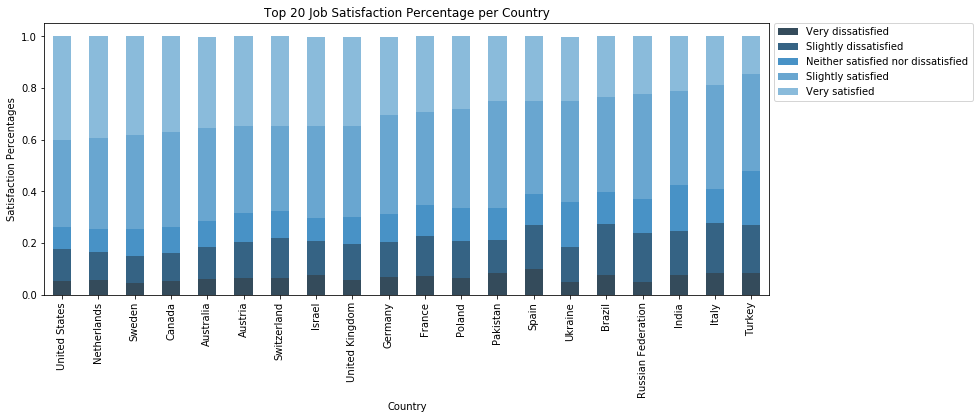

In [6]:
# Visualize the data
pivoted_data.plot(kind='bar', 
                  stacked=True, 
                  colormap=ListedColormap(sns.color_palette("Blues_d")),
                  figsize=(13,5))
plt.legend(loc="upper left", bbox_to_anchor=(1,1.02))
plt.ylabel('Satisfaction Percentages')
plt.title('Top 20 Job Satisfaction Percentage per Country')
plt.show()

The data shows that United States is the best country in terms of job satisfaction of its employees with almost 40% of the developers feel very satisfied and rest of follow other countries.

**2. Different between job satisfaction has a developer, From Undergraduate computer field or those who different field?**

In [7]:
# Create a new columns to flag each respondent if their major is related or not
def check_major(value):
    '''
    input: the value of UndergradMajor column
    output: the mapped value based on IT Related or Non-IT Related  we made in this function
    '''

    if value == 'Computer science, computer engineering, or software engineering' \
    or value == 'Information systems, information technology, or system administration' \
    or value == 'Web development or web design':
        return 'IT Related'
    return 'Not IT Related'

main_branch_data['Major'] = main_branch_data['UndergradMajor'].apply(check_major)

main_branch_data['Major'].value_counts(normalize=True)

IT Related        0.708178
Not IT Related    0.291822
Name: Major, dtype: float64

In [8]:
# Aggregate the data so we know how many respondents in each major (IT related or not IT related)
aggregated_data = main_branch_data.groupby(['Major','JobSat'], as_index=False)['Respondent'].count()

# Add column percentage
total_respondents_per_major = main_branch_data['Major'].value_counts()

aggregated_data['Respondent Percentage'] = aggregated_data \
                                           .apply(lambda x: x['Respondent'] / total_respondents_per_major[x['Major']], axis=1) \
                                           .round(4)

# Pivot the data
aggregated_data = aggregated_data[['Major', 'JobSat', 'Respondent Percentage']]
pivoted_data = pd.pivot_table(aggregated_data, values='Respondent Percentage', index='Major', columns='JobSat')

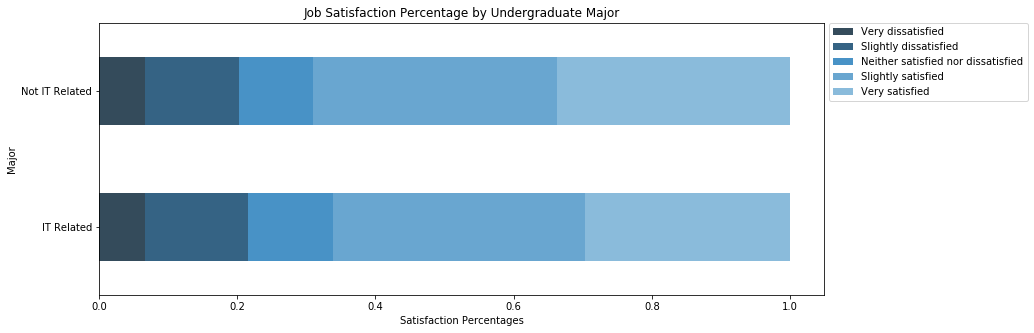

In [10]:
# Visualize the data
pivoted_data.plot(kind='barh', 
                  stacked=True, 
                  colormap=ListedColormap(sns.color_palette("Blues_d")),
                  figsize=(13,5))
plt.legend(loc="upper left", bbox_to_anchor=(1,1.02))
plt.xlabel('Satisfaction Percentages')
plt.title('Job Satisfaction Percentage by Undergraduate Major')
plt.show()

From the visualization, we found that <b>developers whose undergraduate major is not IT-related have slightly better job satisfaction</b> compared those who have IT related background with 34% and 30% respondents feel very satisfied respectively.

**3. Since developers who contribute to open source have higher salary then who are not?**

In [12]:
# Aggregate the data
comp_per_category = main_branch_data.groupby('OpenSourcer', as_index=False)['ConvertedComp'].mean()

comp_per_category

,OpenSourcer,ConvertedComp
0,Never,117254.369170
1,Less than once per year,120802.882927
2,Less than once a month but more than once per ...,123194.248789
3,Once a month or more often,123881.913894


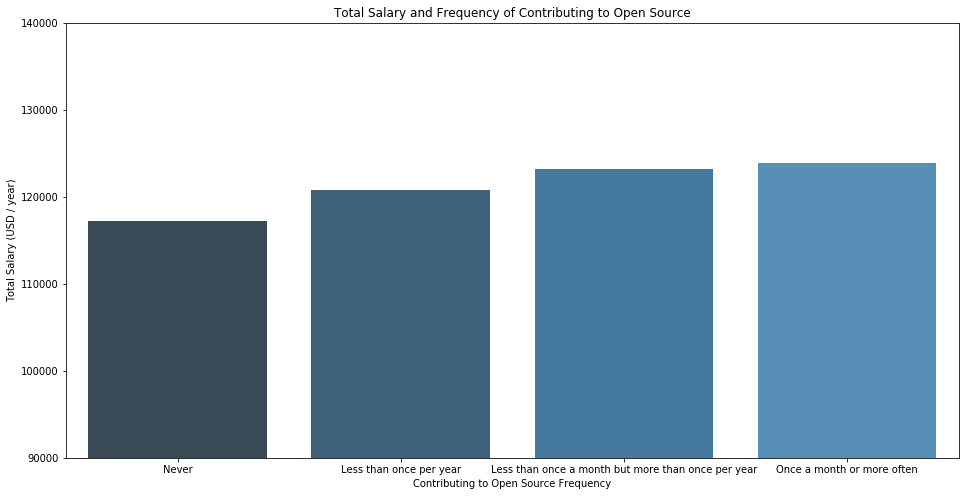

In [13]:
# Visualize the data
plt.figure(figsize=(16, 8))
sns.barplot(data=comp_per_category, x='OpenSourcer', y='ConvertedComp', palette=sns.color_palette("Blues_d"))
plt.ylim(90000,140000)
plt.title('Total Salary and Frequency of Contributing to Open Source')
plt.ylabel('Total Salary (USD / year)')
plt.xlabel('Contributing to Open Source Frequency')
plt.show()

We can see from the data that <b>the more frequent the developers contribute to open source, the higher their salary.</b> People who contribute to open source once a month or more have 7% higher salary than those who never contribute.

---

### Conlusion
In this notebook we did the analysis about developers from Stack Overflow Survey Data 2019, and these are the summary of what we have done.<br>

1. We measure the job satisfaction level for each country and found that <b>United States has the highest job satisfaction level in the world, and 5 of top 10 countries with the highest job satisfaction level are located in Europe</b>.
2. We then looked at their undergraduate major and found that <b>developers whose undergraduate major is not IT-related have slightly better job satisfaction</b>.
3. Finally, we found that <b>developers who contribute more to the open source have the higher salary</b>.